In [1]:
!pip install scikit-plot

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 

# Helper functions for parsing the raw data files:

In [3]:
  
import gzip
import struct


def _load_uint8(f):
    idx_dtype, ndim = struct.unpack('BBBB', f.read(4))[2:]
    shape = struct.unpack('>' + 'I' * ndim, f.read(4 * ndim))
    buffer_length = int(np.prod(shape))
    data = np.frombuffer(f.read(buffer_length), dtype=np.uint8).reshape(shape)
    return data
	
def load_idx(path: str) -> np.ndarray:
    """Reads an array in IDX format from disk.
    Parameters
    ----------
    path : str
        Path of the input file. Will uncompress with `gzip` if path ends in '.gz'.
    Returns
    -------
    np.ndarray
        Output array of dtype ``uint8``.
    References
    ----------
    http://yann.lecun.com/exdb/mnist/
    """
    open_fcn = gzip.open if path.endswith('.gz') else open
    with open_fcn(path, 'rb') as f:
        return _load_uint8(f)




def load_Kannada_mnist(file_type='npz',ds_dir='E:\Ragul\Kannada_MNIST_datataset_paper'):
    if file_type=='npz':
        npz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz')  
        y_test=np.load(os.path.join(npz_dir,'Kannada_MNIST','y_kannada_MNIST_test.npz'))
        y_test=y_test.f.arr_0
        X_test=np.load(os.path.join(npz_dir,'Kannada_MNIST','X_kannada_MNIST_test.npz'))
        X_test=X_test.f.arr_0
        y_train=np.load(os.path.join(npz_dir,'Kannada_MNIST','y_kannada_MNIST_train.npz'))
        y_train=y_train.f.arr_0
        X_train=np.load(os.path.join(npz_dir,'Kannada_MNIST','X_kannada_MNIST_train.npz'))
        X_train=X_train.f.arr_0
    else:
        gz_dir=os.path.join(ds_dir,'Kannada_MNIST_Ubyte_gz') 
        y_test=load_idx(os.path.join(gz_dir,'Kannada_MNIST','t10k-labels-idx1-ubyte.gz'))
        X_test=load_idx(os.path.join(gz_dir,'Kannada_MNIST','t10k-images-idx3-ubyte.gz'))
        y_train=load_idx(os.path.join(gz_dir,'Kannada_MNIST','train-labels-idx1-ubyte.gz'))
        X_train=load_idx(os.path.join(gz_dir,'Kannada_MNIST','train-images-idx3-ubyte.gz'))
    return (X_train, y_train), (X_test, y_test)
def load_Dig_mnist(file_type='npz',ds_dir='E:\Ragul\Kannada_MNIST_datataset_paper'):
    if file_type=='npz':
        npz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz')  
        y_dig=np.load(os.path.join(npz_dir,'Dig_MNIST','y_dig_MNIST.npz'))
        y_dig=y_dig.f.arr_0
        X_dig=np.load(os.path.join(npz_dir,'Dig_MNIST','X_dig_MNIST.npz'))
        X_dig=X_dig.f.arr_0

    else:
        gz_dir=os.path.join(ds_dir,'Kannada_MNIST_Ubyte_gz') 
        y_dig=load_idx(os.path.join(gz_dir,'Dig_MNIST','train-labels-idx1-ubyte.gz'))
        X_dig=load_idx(os.path.join(gz_dir,'Dig_MNIST','train-images-idx3-ubyte.gz'))
    return (X_dig, y_dig)


## 0: First let's list out the directories of the dataset:


In [4]:
ds_dir='E:\Ragul\Kannada_MNIST_datataset_paper'
print(os.listdir(ds_dir))
npz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz')
gz_dir=os.path.join(ds_dir,'Kannada_MNIST_Ubyte_gz')
os.listdir(npz_dir),os.listdir(gz_dir)

['.ipynb_checkpoints', 'kannada-mnist-explore.ipynb', 'kannada_mnist_arxiv_submission.pdf', 'Kannada_MNIST_npz', 'Kannada_MNIST_Ubyte_gz', 'starter-kannada-mnist.ipynb']


(['Dig_MNIST', 'Kannada_MNIST'], ['Dig_MNIST', 'Kannada_MNIST'])

# 1: npz files exploration:

Text(0.5, 0.98, 'Testing set - Classwise mean images')

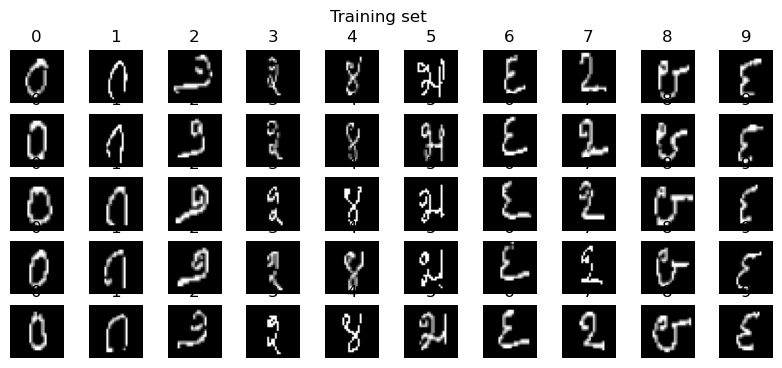

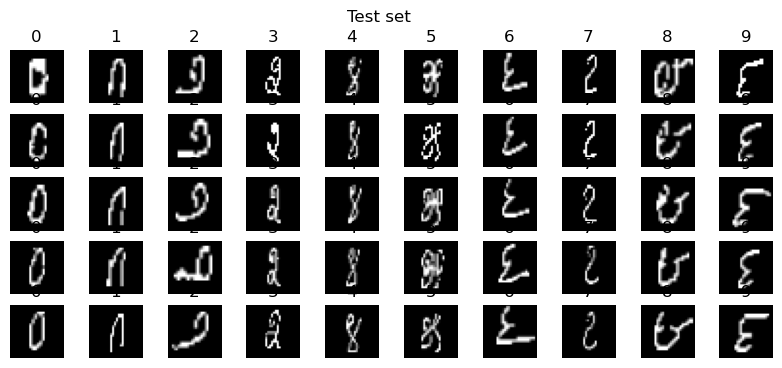

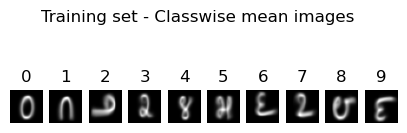

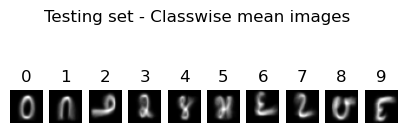

In [5]:
(x_train, y_train), (x_test, y_test)=load_Kannada_mnist('npz')
##################################################
plt.figure(figsize=(10,4))

for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_train[i],cmap='gray')
  plt.axis('Off')
  plt.title(y_train[i])  
# plt.tight_layout()
plt.suptitle('Training set')

plt.figure(figsize=(10,4))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i],cmap='gray')
  plt.axis('Off')
  plt.title(y_test[i]) 
# plt.tight_layout()
plt.suptitle('Test set')
#########################
plt.figure(figsize=(5,2))

for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_train[y_train==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Training set - Classwise mean images')

plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_test[y_test==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Testing set - Classwise mean images')

# 2: The gz files ..

In [6]:
gz_dir=os.path.join(ds_dir,'Kannada_MNIST_npz') 
os.listdir(os.path.join(gz_dir,'Dig_MNIST'))

['X_dig_MNIST.npz', 'y_dig_MNIST.npz']

Text(0.5, 0.98, 'TESTing set - Classwise mean images')

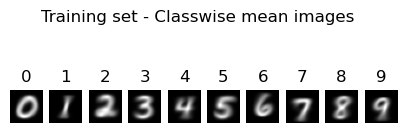

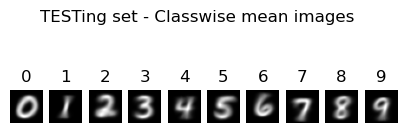

In [7]:
(x_train, y_train), (x_test, y_test)=load_Kannada_mnist('gz')
##################################################
plt.figure(figsize=(5,2))

for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_train[y_train==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Training set - Classwise mean images')

plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_test[y_test==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('TESTing set - Classwise mean images')

# The Dig-MNIST dataset:

Text(0.5, 0.98, 'Dig-MNIST(npz) - Classwise mean images')

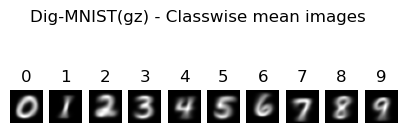

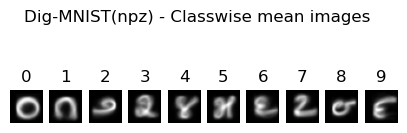

In [8]:
(x_dig_np, y_dig_np)=load_Dig_mnist('npz')
(x_dig_gz, y_dig_gz)=load_Dig_mnist('gz')
plt.figure(figsize=(5,2))

for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_dig_gz[y_dig_gz==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
# plt.tight_layout()
plt.suptitle('Dig-MNIST(gz) - Classwise mean images')

plt.figure(figsize=(5,2))
for i in range(10):
  plt.subplot(1,10,i+1)
  
  plt.imshow(np.mean(x_dig_np[y_dig_np==i],axis=0),cmap='gray')
  plt.axis('Off')
  plt.title(i)  
plt.suptitle('Dig-MNIST(npz) - Classwise mean images')

# PCA-analysis:

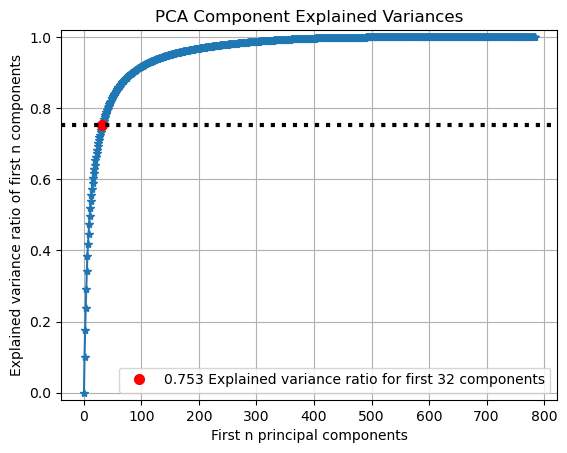

In [9]:
from sklearn.decomposition import PCA
import scikitplot as skplt
pca = PCA(random_state=1)
pca.fit(x_test.reshape(10000,784))
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

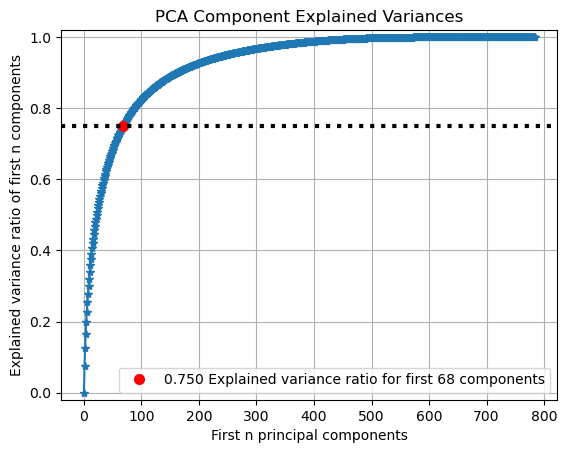

In [10]:
# The Dig-MNIST dataset
pca = PCA(random_state=1)
pca.fit(x_dig_np.reshape(10240,784))
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

In [11]:
# pip install tensorflow


In [12]:

import keras

from tensorflow import keras

from tensorflow.keras import backend as K


batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# Random Forest

Accuracy: 0.9704
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.98      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

ROC AUC: 0.9991475561626355


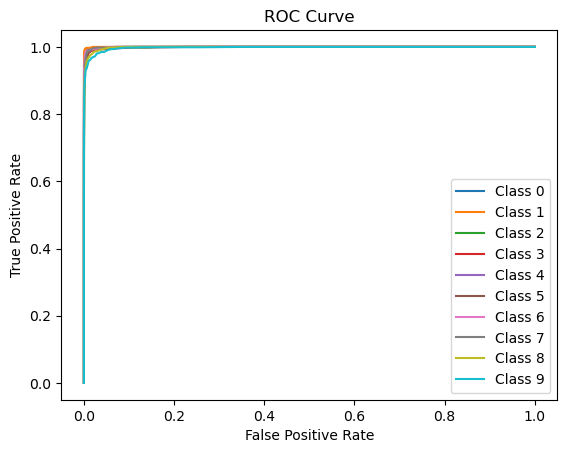

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


x_train_reshaped = x_train.reshape(x_train.shape[0], -1)  
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_reshaped, y_train)


y_pred = rf_classifier.predict(x_test_reshaped)

# Evaluate the model with accuracy and classification report
accuracy = rf_classifier.score(x_test_reshaped, y_test)
print("Accuracy:", accuracy)

class_names = [str(i) for i in range(10)]  
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Calculate ROC curve and AUC
y_scores = rf_classifier.predict_proba(x_test_reshaped)
roc_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")  
print("ROC AUC:", roc_auc)

fpr = dict()
tpr = dict()
roc_curve_dict = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


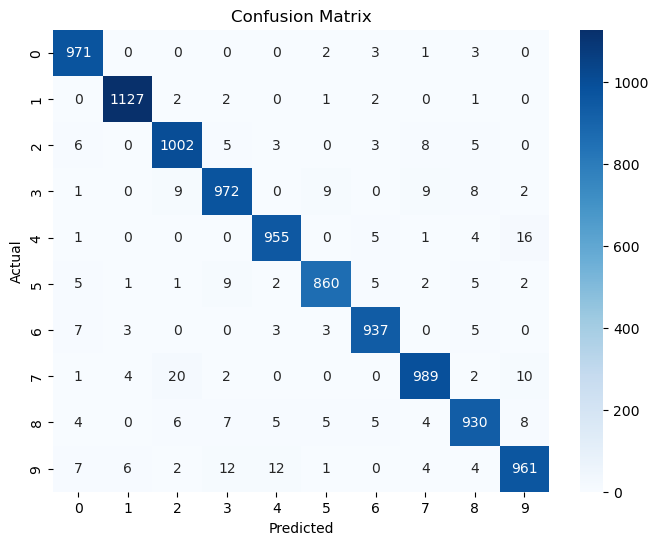

In [14]:
# Compute and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Decision Tree

Accuracy: 0.8754
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000

ROC AUC: 0.9299954927577161


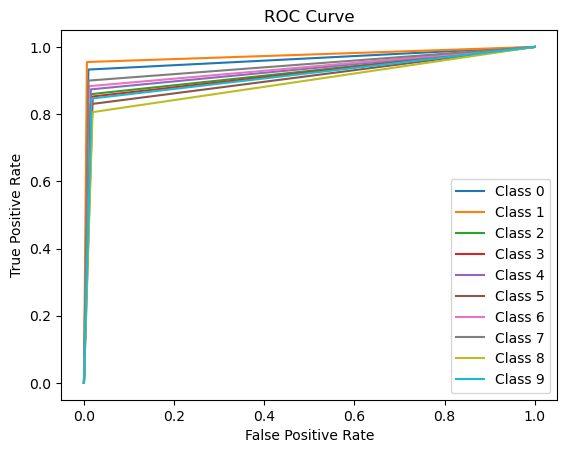

In [15]:
from sklearn.tree import DecisionTreeClassifier


# Reshape the data for DecisionTreeClassifier
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)  
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(x_train_reshaped, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(x_test_reshaped)

# Evaluate the model with accuracy and classification report
accuracy = dt_classifier.score(x_test_reshaped, y_test)
print("Accuracy:", accuracy)

class_names = [str(i) for i in range(10)] 
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Calculate ROC curve and AUC
y_scores = dt_classifier.predict_proba(x_test_reshaped)
roc_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_curve_dict = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


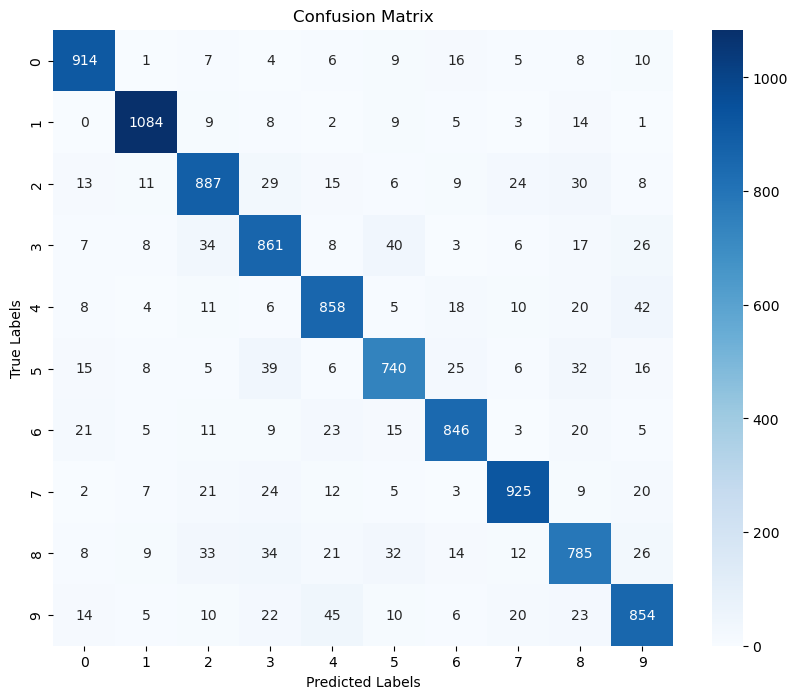

In [16]:


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# SVM

Accuracy: 0.9792
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

ROC AUC: 0.999731681360492


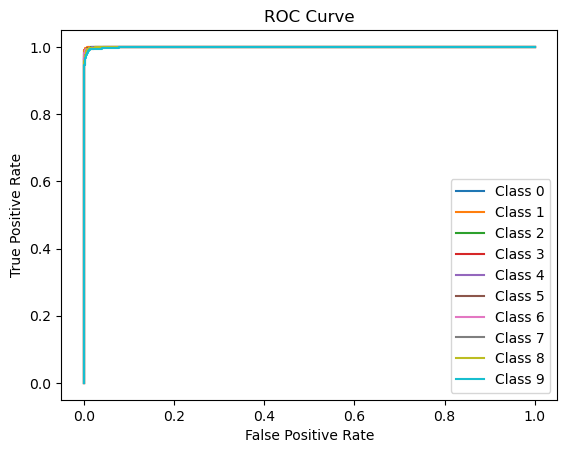

In [17]:
from sklearn.svm import SVC


# Reshape the data for SVM
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)  # Flatten each image to a 1D array
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)

# Initialize the SVM classifier
svm_classifier = SVC(probability=True, random_state=42)  # Probability=True for ROC

# Train the model
svm_classifier.fit(x_train_reshaped, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(x_test_reshaped)

# Evaluate the model with accuracy and classification report
accuracy = svm_classifier.score(x_test_reshaped, y_test)
print("Accuracy:", accuracy)

class_names = [str(i) for i in range(10)]  # Replace with your class labels if needed
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Calculate ROC curve and AUC
y_scores = svm_classifier.predict_proba(x_test_reshaped)
roc_auc = roc_auc_score(y_test, y_scores, multi_class="ovr")  # "ovr" for multi-class ROC
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr = dict()
tpr = dict()
roc_curve_dict = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_scores[:, i])
    plt.plot(fpr[i], tpr[i], label=f'Class {i}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


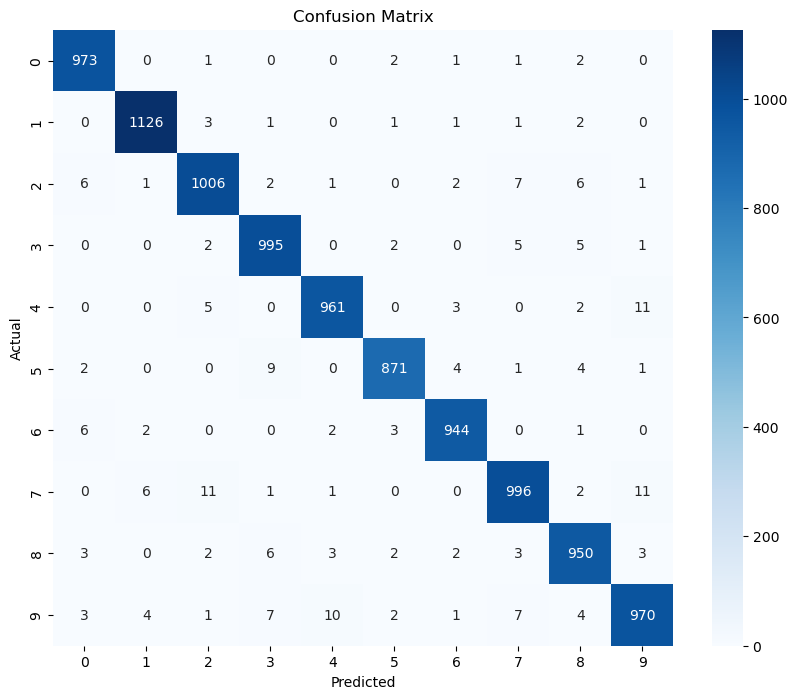

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# KNN

Accuracy: 0.9688
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



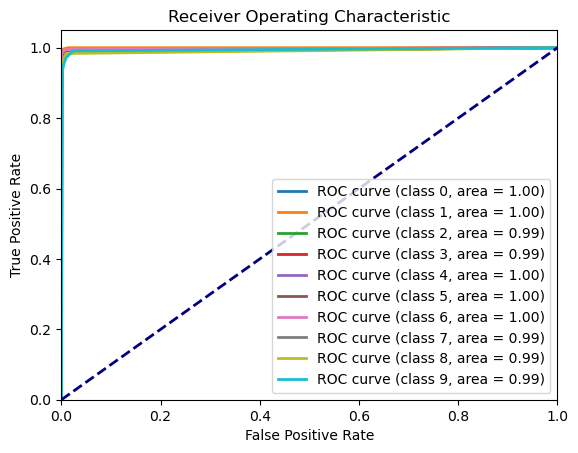

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import numpy as np


# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(x_train_reshaped, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(x_test_reshaped)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate ROC curve and AUC for each class
n_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_class = (y_test == i).astype(int)
    y_pred_proba = knn_classifier.predict_proba(x_test_reshaped)
    fpr[i], tpr[i], _ = roc_curve(y_test_class, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


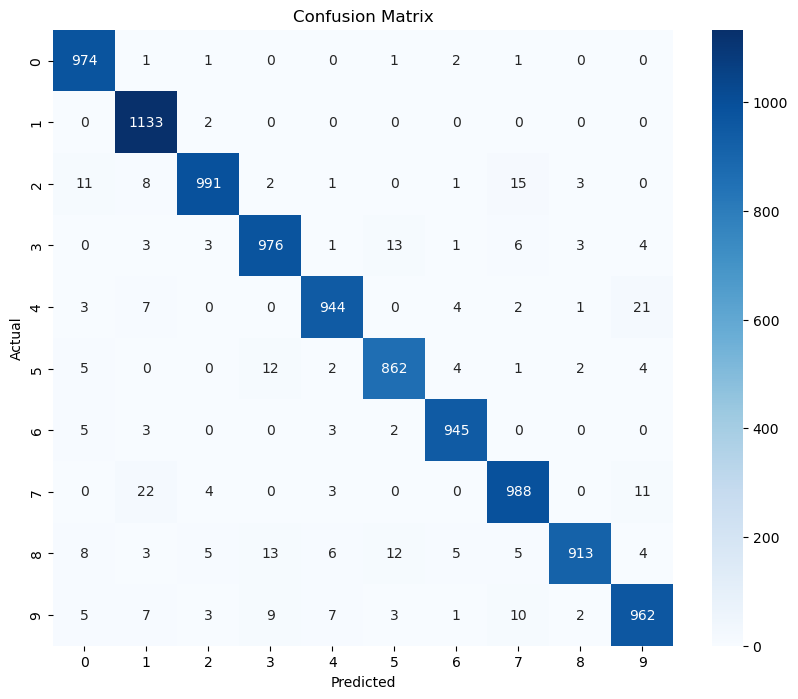

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

Accuracy: 0.5558
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

    accuracy                           0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000



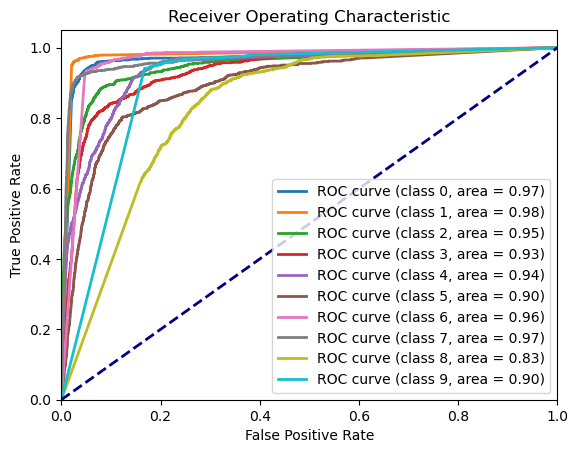

In [21]:
from sklearn.naive_bayes import GaussianNB


# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(x_train_reshaped, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(x_test_reshaped)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# Calculate ROC curve and AUC for each class
n_classes = len(np.unique(y_train))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_test_class = (y_test == i).astype(int)
    y_pred_proba = nb_classifier.predict_proba(x_test_reshaped)
    fpr[i], tpr[i], _ = roc_curve(y_test_class, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (class %d, area = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


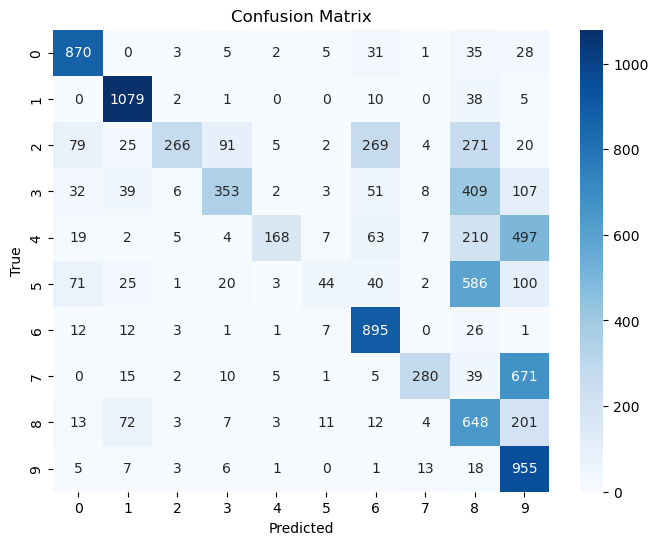

In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()